In [1]:
import pandas as pd
import numpy as np

In [2]:
athlete_host_data = pd.read_csv("summerOly_athletes_with_if_host.csv")
athlete_host_data

athlete_host_data["Medal"], unique_medal = pd.factorize(athlete_host_data["Medal"])
print(unique_medal)

athlete_host_data = athlete_host_data.drop_duplicates(subset=['NOC', 'Year', 'Event', 'Medal'])
athlete_host_data

Index(['No medal', 'Gold', 'Bronze', 'Silver'], dtype='object')


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,if_host
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,0,0
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,0,0
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,0,0
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,0
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,0,0
...,...,...,...,...,...,...,...,...,...,...
252545,Jasmine Jones,F,United States,USA,2024,Paris,Athletics,Women's 400m Hurdles,0,0
252555,Steven Insixiengmay,M,Lao PDR,LAO,2024,Paris,Swimming,Men's 100m Breaststroke,0,0
252558,Khrystyna Homan,F,Ukraine,UKR,2024,Paris,Judo,Women +78 kg,0,0
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,0,0


In [3]:
athlete_host_data["Medal"] = (athlete_host_data["Medal"] > 0).astype(int)
athlete_host_data

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,if_host
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,0,0
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,0,0
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,0,0
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,0
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,0,0
...,...,...,...,...,...,...,...,...,...,...
252545,Jasmine Jones,F,United States,USA,2024,Paris,Athletics,Women's 400m Hurdles,0,0
252555,Steven Insixiengmay,M,Lao PDR,LAO,2024,Paris,Swimming,Men's 100m Breaststroke,0,0
252558,Khrystyna Homan,F,Ukraine,UKR,2024,Paris,Judo,Women +78 kg,0,0
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,0,0


In [4]:
# Filter the dataframe based on the conditions
filtered_data = athlete_host_data[(athlete_host_data['Year'] >= 2012) & (athlete_host_data['Medal'] == 1)]

# Drop duplicates to count each athlete only once
filtered_data = filtered_data.drop_duplicates(subset=['Name'])

# Group by 'NOC' and count the number of unique athletes
key_athletes = filtered_data.groupby('NOC').size().reset_index(name='Athlete_Count')

key_athletes

,NOC,Athlete_Count
0,AFG,1
1,AIN,4
2,ALB,2
3,ALG,4
4,ARG,11
...,...,...
115,USA,319
116,UZB,29
117,VEN,8
118,VIE,1


In [5]:
athlete_host_data = athlete_host_data.drop(columns=["Name", "Sex", "Team", "City"])
athlete_host_data["Sport"], unique_sport = pd.factorize(athlete_host_data["Sport"])
athlete_host_data["Event"], unique_event = pd.factorize(athlete_host_data["Event"])
print(unique_sport)
print(unique_event)
athlete_host_data

Index(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics', 'Swimming',
       'Badminton', 'Sailing', 'Gymnastics', 'Art Competitions', 'Handball',
       'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey', 'Rowing',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon', 'Golf',
       'Softball', 'Archery', 'Volleyball', 'Synchronized Swimming',
       'Table Tennis', 'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens',
       'Trampolining', 'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse',
       'Polo', 'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota', 'Alpinism',
       'Aeronautics', 'Cycling Road', 'Artistic Gymnastics', 'Karate',
       'Baseball/Softball', 'Trampoline Gymnastics', 'Marathon Swimming',
       'Canoe Slalom', 'Surfing', 'Canoe Sprint', 'Cycling BMX Racing',
       'Equestrian', 'Artist

,NOC,Year,Sport,Event,Medal,if_host
0,CHN,1992,0,0,0,0
1,CHN,2012,1,1,0,0
2,DEN,1920,2,2,0,0
3,DEN,1900,3,3,1,0
4,NED,1932,4,4,0,0
...,...,...,...,...,...,...
252545,USA,2024,4,923,0,0
252555,LAO,2024,5,665,0,0
252558,UKR,2024,1,744,0,0
252560,GEQ,2024,4,711,0,0


In [6]:
# LSTM with weighted samples
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 假设 athlete_host_data 包含 'NOC', 'Year', 'Event', 'Medal' 列
# 特征提取与聚合
grouped_data = athlete_host_data.groupby(['NOC', 'Year']).agg({'Medal': 'sum'}).reset_index()
pivot_data = grouped_data.pivot(index='Year', columns='NOC', values='Medal').fillna(0)

# 时间序列构建
time_series_data = pivot_data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data)

def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 12  # 使用过去12年的数据来预测下一年
X, Y = create_dataset(scaled_data, time_step)

# 确保 X 和 Y 的长度一致
assert len(X) == len(Y), "Length of X and Y should be the same"

# 设置样本权重
weights = np.ones(len(X))
weights[pivot_data.index[:len(X)] >= 2012] = 1.2  # 2012年及以后的数据权重为2，其余为1

# 划分训练集和测试集
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]
weights_train = weights[:train_size]

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=100))
model.add(Dense(units=X_train.shape[2], activation='relu'))  # 使用ReLU激活函数确保输出非负
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, Y_train, epochs=200, batch_size=64, sample_weight=weights_train, verbose=1)

# 预测2028年
last_known_data = scaled_data[-time_step:, :]
future_pred = model.predict(last_known_data.reshape((1, last_known_data.shape[0], last_known_data.shape[1])))
future_pred = scaler.inverse_transform(future_pred)

# 丢弃包含NA的预测结果
future_pred_df = pd.DataFrame(future_pred, columns=pivot_data.columns)
future_pred_df.dropna(axis=1, inplace=True)

print("Predicted medals for 2028:", future_pred_df.values.flatten())

# 显示结果
countries = future_pred_df.columns.tolist()
predictions_2028 = dict(zip(countries, future_pred_df.values.flatten()))
for country, medal_count in predictions_2028.items():
    print(f"{country}: {medal_count:.2f} medals")

Epoch 1/200


d:\Anaconda\envs\newenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0645
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0622
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0596
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0569
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0545
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0526
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0511
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0498
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0483
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0468
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0454
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0444
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0434
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0426
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0418
Epoch 16/200
1/1 ━━━━━━━━━━━━━━━━

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input


# 特征提取与聚合
grouped_data = athlete_host_data.groupby(['NOC', 'Year']).agg({'Medal': 'sum'}).reset_index()
pivot_data = grouped_data.pivot(index='Year', columns='NOC', values='Medal').fillna(0)

# 时间序列构建
time_series_data = pivot_data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data)

def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 12  # 使用过去12年的数据来预测下一年
X, Y = create_dataset(scaled_data, time_step)

# 划分训练集和测试集
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# 构建LSTM模型
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(units=X_train.shape[2], activation='relu'))  # 使用ReLU激活函数确保输出非负
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, Y_train, epochs=200, batch_size=64, verbose=1)

# 预测2028年
last_known_data = scaled_data[-time_step:, :]
future_pred = model.predict(last_known_data.reshape((1, last_known_data.shape[0], last_known_data.shape[1])))
future_pred = scaler.inverse_transform(future_pred)

# 丢弃包含NA的预测结果
future_pred_df = pd.DataFrame(future_pred, columns=pivot_data.columns)
future_pred_df.dropna(axis=1, inplace=True)

print("Predicted medals for 2028:", future_pred_df.values.flatten())

# 显示结果
countries = future_pred_df.columns.tolist()
predictions_2028 = dict(zip(countries, future_pred_df.values.flatten()))
for country, medal_count in predictions_2028.items():
    print(f"{country}: {medal_count:.2f} medals")





Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0583
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0562
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0542
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0521
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0500
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0479
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0460
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0444
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0430
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0418
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0409
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0401
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0394
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0387
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0380
Epoch 16/200
1/1 ━━━━

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

# 假设 athlete_host_data 包含 'NOC', 'Year', 'Event', 'Medal' 列
# 特征提取与聚合
grouped_data = athlete_host_data.groupby(['NOC', 'Year']).agg({
    'Medal': lambda x: (x > 0).sum(),  # 计算获奖次数
    'Event': 'nunique'  # 计算参与的不同项目数量
}).reset_index()

pivot_medals = grouped_data.pivot(index='Year', columns='NOC', values='Medal').fillna(0)
pivot_athletes = grouped_data.pivot(index='Year', columns='NOC', values='Event').fillna(0)

# 合并两个 pivot 表
pivot_data = pd.concat([pivot_medals, pivot_athletes], axis=1, keys=['Medals', 'Athletes'])

# 时间序列构建
time_series_data = pivot_data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data)

def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 12  # 使用过去12年的数据来预测下一年
X, Y = create_dataset(scaled_data, time_step)

# 划分训练集和测试集
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]


# 构建LSTM模型
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(units=X_train.shape[2], activation='relu'))  # 使用ReLU激活函数确保输出非负
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, Y_train, epochs=200, batch_size=64, verbose=1)

# 预测2028年
last_known_data = scaled_data[-time_step:, :]
future_pred = model.predict(last_known_data.reshape((1, last_known_data.shape[0], last_known_data.shape[1])))
future_pred = scaler.inverse_transform(future_pred)

# 丢弃包含NA的预测结果
future_pred_df = pd.DataFrame(future_pred, columns=pivot_data.columns.get_level_values(1).tolist())
future_pred_df.dropna(axis=1, inplace=True)

print("Predicted medals and athletes for 2028:", future_pred_df.values.flatten())

# 显示结果
countries = future_pred_df.columns.tolist()
predictions_2028 = dict(zip(countries, future_pred_df.values.flatten()))
for country, value in predictions_2028.items():
    print(f"{country}: {value:.2f}")

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1245
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1179
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1108
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1037
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0973
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0922
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0882
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0847
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0814
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0783
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0758
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0738
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0721
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0707
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0696
Epoch 16/200
1/1 ━━━━

In [101]:
# Random Forest

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 假设 athlete_host_data 包含 'NOC', 'Year', 'Event', 'Medal' 列
# 特征提取与聚合
grouped_data = athlete_host_data.groupby(['NOC', 'Year']).agg({
    'Medal': lambda x: (x > 0).sum(),  # 计算获奖次数
    'Event': 'nunique'  # 计算参与的不同项目数量
}).reset_index()

pivot_medals = grouped_data.pivot(index='Year', columns='NOC', values='Medal').fillna(0)
pivot_athletes = grouped_data.pivot(index='Year', columns='NOC', values='Event').fillna(0)

# 合并两个 pivot 表
pivot_data = pd.concat([pivot_medals, pivot_athletes], axis=1, keys=['Medals', 'Athletes'])

# 时间序列构建
time_series_data = pivot_data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data)

def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 12  # 使用过去12年的数据来预测下一年
X, Y = create_dataset(scaled_data, time_step)

# 将三维数据转换为二维数据
num_samples, num_timesteps, num_features = X.shape
X = X.reshape(num_samples, num_timesteps * num_features)

# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 构建随机森林回归模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# 预测2028年
last_known_data = scaled_data[-time_step:, :]
last_known_data_flat = last_known_data.reshape(1, -1)
future_pred = model.predict(last_known_data_flat)
future_pred = scaler.inverse_transform(future_pred.reshape(-1, num_features))

# 丢弃包含NA的预测结果
future_pred_df = pd.DataFrame(future_pred, columns=pivot_data.columns.get_level_values(1).tolist())
future_pred_df.dropna(axis=1, inplace=True)

print("Predicted medals and athletes for 2028:", future_pred_df.values.flatten())

# 显示结果
countries = future_pred_df.columns.tolist()
predictions_2028 = dict(zip(countries, future_pred_df.values.flatten()))
for country, value in predictions_2028.items():
    print(f"{country}: {value:.2f}")

[[0.         0.         0.         ... 0.87671233 0.         0.15789474]
 [0.         0.         0.         ... 0.         0.32       0.5       ]
 [0.         0.         0.         ... 0.         0.28       0.21052632]
 ...
 [0.         0.         0.         ... 0.98630137 0.44       1.        ]
 [0.         0.         0.         ... 0.         0.24       0.28947368]
 [0.         0.         0.         ... 1.         0.48       0.        ]]
Predicted medals and athletes for 2028: [2.1000e-01 3.0000e-02 0.0000e+00 0.0000e+00 1.2200e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 3.2500e+00 2.7500e+00 0.0000e+00
 0.0000e+00 3.7640e+01 3.6100e+00 6.7300e+00 1.5800e+00 0.0000e+00
 5.0000e-02 2.1000e-01 4.6800e+00 0.0000e+00 2.9000e-01 0.0000e+00
 0.0000e+00 0.0000e+00 9.2000e+00 0.0000e+00 0.0000e+00 3.6000e-01
 1.4660e+01 6.4000e-01 0.0000e+00 9.1300e+00 2.6000e-01 0.0000e+00
 0.0000e+00 1.8640e+01 0.0000e+00 0.0000e+00 0.0000e+00 4.3000e-01
 6.8220e+01 5.4000e-01 2.7000e-01 0.0000e+00 0.

In [116]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 假设 athlete_host_data 包含 'NOC', 'Year', 'Event', 'Medal' 列
# 特征提取与聚合
grouped_data = athlete_host_data.groupby(['NOC', 'Year']).agg({
    'Medal': lambda x: (x > 0).sum(),  # 计算获奖次数
    'Event': 'nunique'  # 计算参与的不同项目数量
}).reset_index()

pivot_medals = grouped_data.pivot(index='Year', columns='NOC', values='Medal').fillna(0)
pivot_athletes = grouped_data.pivot(index='Year', columns='NOC', values='Event').fillna(0)

# 合并两个 pivot 表
pivot_data = pd.concat([pivot_medals, pivot_athletes], axis=1, keys=['Medals', 'Athletes'])

# 时间序列构建
time_series_data = pivot_data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data)

def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 12  # 使用过去12年的数据来预测下一年
X, Y = create_dataset(scaled_data, time_step)

# 将三维数据转换为二维数据
num_samples, num_timesteps, num_features = X.shape
X = X.reshape(num_samples, num_timesteps * num_features)

# 选择一个特定的目标国家进行预测，例如 'USA'
target_country = 'USA'
target_feature_index = pivot_data.columns.get_loc(('Medals', target_country))

Y = Y[:, target_feature_index]

# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 构建梯度提升回归模型
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, Y_train)

# 预测2028年
last_known_data = scaled_data[-time_step:, :]
last_known_data_flat = last_known_data.reshape(1, -1)
future_pred = model.predict(last_known_data_flat)

# 创建一个只有目标国家的反归一化数组
inverse_scaler = MinMaxScaler(feature_range=(0, 1))
inverse_scaler.min_ = scaler.min_[target_feature_index]
inverse_scaler.scale_ = scaler.scale_[target_feature_index]

future_pred_rescaled = inverse_scaler.inverse_transform(future_pred.reshape(-1, 1))

print(f"Predicted medals for {target_country} in 2028: {future_pred_rescaled[0][0]:.2f}")

Predicted medals for USA in 2028: 92.18


d:\Anaconda\envs\newenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Anaconda\envs\newenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Anaconda\envs\newenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Anaconda\envs\newenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ret

Predicted medals for USA in 2028: 107.67


TypeError: unsupported operand type(s) for +: 'numpy.int64' and 'DateOffset'

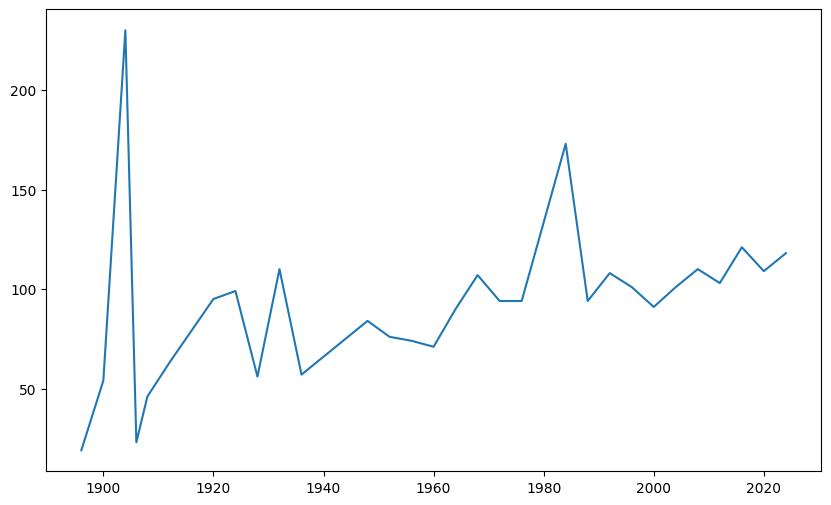

In [121]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# 假设 athlete_host_data 包含 'NOC', 'Year', 'Event', 'Medal' 列
# 特征提取与聚合
grouped_data = athlete_host_data.groupby(['NOC', 'Year']).agg({
    'Medal': lambda x: (x > 0).sum(),  # 计算获奖次数
}).reset_index()

# 选择一个特定的目标国家进行预测，例如 'USA'
target_country = 'USA'
country_data = grouped_data[grouped_data['NOC'] == target_country]

# 设置时间为索引
country_data.set_index('Year', inplace=True)

# 初始化 SARIMAX 模型
model = SARIMAX(country_data['Medal'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))

# 拟合模型
model_fit = model.fit(disp=False)

# 进行预测
forecast_steps = 1  # 预测未来的年数
forecast = model_fit.forecast(steps=forecast_steps)

# 获取预测结果
predicted_value_2028 = forecast.iloc[0]
print(f"Predicted medals for {target_country} in 2028: {predicted_value_2028:.2f}")

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.plot(country_data.index, country_data['Medal'], label='Historical Medals')
plt.plot(pd.date_range(start=country_data.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y'), forecast, label='Forecasted Medals', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title(f'Medal Predictions for {target_country}')
plt.legend()
plt.show()

Mean Squared Error: 130.36
Predicted medals for USA in 2028: 101.08


C:\Users\17555\AppData\Local\Temp\ipykernel_6260\3584060374.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year_Lag1'] = country_data['Medal'].shift(1)
C:\Users\17555\AppData\Local\Temp\ipykernel_6260\3584060374.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year_Lag2'] = country_data['Medal'].shift(2)
C:\Users\17555\AppData\Local\Temp\ipykernel_6260\3584060374.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

TypeError: unsupported operand type(s) for +: 'numpy.int64' and 'DateOffset'

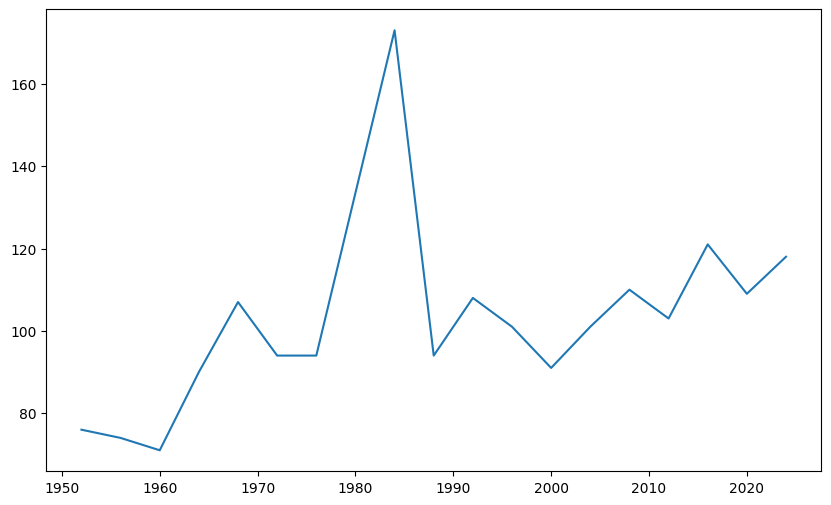

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# 假设 athlete_host_data 包含 'NOC', 'Year', 'Event', 'Medal' 列
# 特征提取与聚合
grouped_data = athlete_host_data.groupby(['NOC', 'Year']).agg({
    'Medal': lambda x: (x > 0).sum(),  # 计算获奖次数
}).reset_index()

# 选择一个特定的目标国家进行预测，例如 'USA'
target_country = 'USA'
country_data = grouped_data[grouped_data['NOC'] == target_country]

# 设置时间为索引
country_data.set_index('Year', inplace=True)

# 添加时间特征
country_data['Year_Lag1'] = country_data['Medal'].shift(1)
country_data['Year_Lag2'] = country_data['Medal'].shift(2)
country_data['Year_Lag3'] = country_data['Medal'].shift(3)
country_data['Year_Lag4'] = country_data['Medal'].shift(4)
country_data['Year_Lag5'] = country_data['Medal'].shift(5)
country_data['Year_Lag6'] = country_data['Medal'].shift(6)
country_data['Year_Lag7'] = country_data['Medal'].shift(7)
country_data['Year_Lag8'] = country_data['Medal'].shift(8)
country_data['Year_Lag9'] = country_data['Medal'].shift(9)
country_data['Year_Lag10'] = country_data['Medal'].shift(10)
country_data['Year_Lag11'] = country_data['Medal'].shift(11)
country_data['Year_Lag12'] = country_data['Medal'].shift(12)

# 删除包含 NaN 的行
country_data.dropna(inplace=True)

# 特征和目标变量
X = country_data[['Year_Lag1', 'Year_Lag2', 'Year_Lag3', 'Year_Lag4', 'Year_Lag5',
                  'Year_Lag6', 'Year_Lag7', 'Year_Lag8', 'Year_Lag9', 'Year_Lag10',
                  'Year_Lag11', 'Year_Lag12']]
y = country_data['Medal']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 设置样本权重
weights = np.where(country_data.index >= 2012, 2, 1)  # 2012年及以后的数据权重为2，其余为1
weights_train = weights[X.index.isin(X_train.index)]

# 初始化 XGBoost 回归模型
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 训练模型
model.fit(X_train, y_train, sample_weight=weights_train)

# 进行预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# 预测2028年
last_known_data = country_data.tail(12)
future_data = pd.DataFrame({
    'Year_Lag1': last_known_data['Medal'].iloc[-1],
    'Year_Lag2': last_known_data['Medal'].iloc[-2],
    'Year_Lag3': last_known_data['Medal'].iloc[-3],
    'Year_Lag4': last_known_data['Medal'].iloc[-4],
    'Year_Lag5': last_known_data['Medal'].iloc[-5],
    'Year_Lag6': last_known_data['Medal'].iloc[-6],
    'Year_Lag7': last_known_data['Medal'].iloc[-7],
    'Year_Lag8': last_known_data['Medal'].iloc[-8],
    'Year_Lag9': last_known_data['Medal'].iloc[-9],
    'Year_Lag10': last_known_data['Medal'].iloc[-10],
    'Year_Lag11': last_known_data['Medal'].iloc[-11],
    'Year_Lag12': last_known_data['Medal'].iloc[-12]
}, index=[2028])

predicted_value_2028 = model.predict(future_data)[0]
print(f"Predicted medals for {target_country} in 2028: {predicted_value_2028:.2f}")

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.plot(country_data.index, country_data['Medal'], label='Historical Medals')
plt.plot(pd.date_range(start=country_data.index[-1] + pd.DateOffset(years=1), periods=1, freq='Y'), predicted_value_2028, label='Forecasted Medals 2028', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title(f'Medal Predictions for {target_country}')
plt.legend()
plt.show()

In [17]:
grouped_data[grouped_data["NOC"] == "EUN"]

,NOC,Year,Medal
948,EUN,1992,112


In [112]:
grouped_data[grouped_data["NOC"] == "ZIM"]

,NOC,Year,Medal
3207,ZIM,1928,0
3208,ZIM,1960,0
3209,ZIM,1964,0
3210,ZIM,1980,1
3211,ZIM,1984,0
3212,ZIM,1988,0
3213,ZIM,1992,0
3214,ZIM,1996,0
3215,ZIM,2000,0
3216,ZIM,2004,3


In [15]:
grouped_data[grouped_data["NOC"] == "FRG"]

,NOC,Year,Medal
1024,FRG,1968,26
1025,FRG,1972,40
1026,FRG,1976,39
1027,FRG,1984,59
1028,FRG,1988,40


In [25]:
grouped_data[grouped_data["NOC"] == "ZIM"]

,NOC,Year,Medal
3207,ZIM,1928,0
3208,ZIM,1960,0
3209,ZIM,1964,0
3210,ZIM,1980,1
3211,ZIM,1984,0
3212,ZIM,1988,0
3213,ZIM,1992,0
3214,ZIM,1996,0
3215,ZIM,2000,0
3216,ZIM,2004,3


In [75]:
pivot_data

NOC,AFG,AHO,AIN,ALB,ALG,AND,ANG,ANT,ANZ,ARG,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
